# Lab1: Logistic Regression from Scratch

In this lab, your task is to implement a logistic regression classifier from scratch. We shall train a simple cat detector. 

Objectives:
- Build the intuition on deep learning by implementing logistic regression from scratch. 

Instructions:
- Build the following functions for logistic Regression
    - Parameter initialization
    - Cost Function
    - Computing the gradient (for optimization)
    - Optimization using gradient descent 
- Train a cat detector
- Do not use loops (for/while) in your code, unless the instructions explicitly ask you to do so.

### Content:
1. [Section 1: Loading the dataset](#Section-1:-Loading-the-dataset)
2. [Section 2: Implementing the Logistic Regression](#Section-2:-Implementing-the-Logistic-Regression)
    1. [Forward propagation](#2.1-Forward-propagation)
    2. [Cost function](#2.2-Cost-function)
    3. [Backpropagation](#2.3-Backpropagation)
    4. [Training with Gradient Descent](#2.4-Training-with-Gradient-Descent)
    5. [Evaluating the model](#2.5-Evaluating-the-model)
3. [Section 3: Test with your own image](#Section-3:-Test-with-your-own-image)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd /content/drive/MyDrive/UCCD3074_Labs/UCCD3074_Lab1/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from utils import load_dataset

---
## Section 1: Loading the dataset ##

### Load the dataset

The dataset is stored in the file *data.h5*. Each sample is an image of shape `(height, width, 3)`. The images are labeled as cat (`y=1`) or non-cat (`y=0`)
- a training set (`X_train`, `Y_train`). . 
- a test set (`X_test`, `Y_test`).

In [ ]:
# Loading the data (cat/non-cat)
X_train_ori, Y_train, X_test_ori, Y_test, classes = load_dataset()

The prefix "_ori" is added because we are going to preprocess them. After preprocessing, they will be removed.

<font color="blue">
    
**Exercise 1**: 

1. Show the number of samples in the training and testing set
2. Show the resolution of of the image in the training and testing set

Expected ans:
```
#samples in training set: 209
#samples in test set: 50
Resolution in training set: (64, 64, 3)
Resolution in test set: (64, 64, 3)
```

In [ ]:
### START CODE HERE ### (≈ 4 lines of code)
# ...
### END CODE HERE ###

print('#samples in training set:', m_train)
print('#samples in test set:', m_test)
print('Resolution in training set:', train_img_res)
print('Resolution in test set:', test_img_res)

<font color="blue">
    
**Exercise 2**: 

Display the training image at index 27 and retrieve its label.

Expected ans:

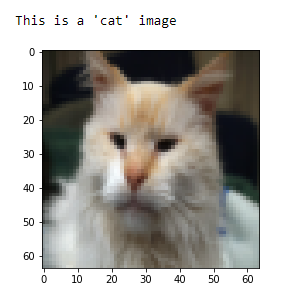

In [ ]:
idx = 27

### START CODE HERE ### (≈ 2 lines of code)
# ...
### END CODE HERE ###

if iscat:
    print("This is a 'cat' image")
else:
    print("Not a cat")

### Flatten the sample

For our implementation of the Logistic Regression, the expected input and output to the logistic regression has the following shape:
1. input: `(nx, m)`
2. output: `(1, m)`

where each column represents a sample. Therefore, we need to change the original shape of `X` from `(m, h, w, c)` to `(h*w*c, m)` where `h*w*c = nx`.

<font color="blue">
    
#### Exercise 3:

Reshape `X_train_ori` and `X_test_ori` to  `X_train_flatten` and `X_test_flatten` of shape `(nx, m)`. 
    
Hints: Use the reshape `X.reshape()` to flatten the 3 dimensions (`h`, `w` and `c`) to get `(m, nx)` and then use transpose `X.T` functions to get `(nx, m)`
    
Expected output:

```
train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
First column (sample) in training set:  [17 31 56 ...  0  0  0]
```
    
</font>

In [ ]:
# Reshape the training and test examples

### START CODE HERE ### (≈ 2 lines of code)
# ...
### END CODE HERE ###

print ("train_set_x_flatten shape: " + str(X_train_flatten.shape))
print ("train_set_y shape: " + str(Y_train.shape))
print ("test_set_x_flatten shape: " + str(X_test_flatten.shape))
print ("test_set_y shape: " + str(Y_test.shape))
print ("First column (sample) in training set: ", X_train_flatten[:, 0])

### Preprocessing the dataset

The pixel in an image lies in the range [0, 255]. For image samples, it is common to preprocess the data by scaling the pixel to the range [0, 1] by dividing the pixels by 255 (the maximum value of a pixel channel).

<font color="blue">
    
#### Exercise 4:

Preprocess the data so that the pixel values lie in the range [0, 1]. Save the training and testing set as `X_train` and `X_test`, respectively.
    
Expected ans:
```
Range of X_train is [0.0, 1.0]
Range of X_test is [0.0, 1.0]
```

In [ ]:
### START CODE HERE ### (≈ 2 lines of code)
# ...
### START CODE HERE ### (≈ 2 lines of code)

print('Range of X_train is [{}, {}]'.format(X_train.min(), X_train.max()))
print('Range of X_test is [{}, {}]'.format(X_test.min(), X_test.max()))

---

## Section 2: Implementing the Logistic Regression

In this section, you will build a Logistic Regression. Remember that logistic regression is a neural network with single layer, single neuron.

### 2.1 Forward propagation

In the following, we shall implement the score function to perform forward propagation. The score function is given as follows:

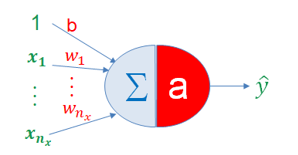

<font color="blue">

#### Exercise 5

Implement `sigmoid()`. As you've seen in the figure above, you need to compute 

$sigmoid(z) = \frac{1}{1 + e^{-z}}$

to make predictions. Use numpy in your implementation.
    
Expected result:

```
array([0.5, 0.88079708])
```
</font>

In [ ]:
def sigmoid(z):
    ### START CODE HERE ### (≈ 1 line of code)
    # ...
    ### END CODE HERE ### 
    return s

In [ ]:
x = np.array((0,2))
sigmoid(x)

<font color="blue">

#### Exercise 6

1. Implement the forward propagation algorithm to make predictions. 

$$Z = w^TX + b\tag{1}$$
$$Yhat = sigmoid(Z)\tag{2}$$
    
2. Predict the class of the samples:
    
$$predicted = Yhat \geq 0.5\tag{3}$$

3. Verify your code based on this example:

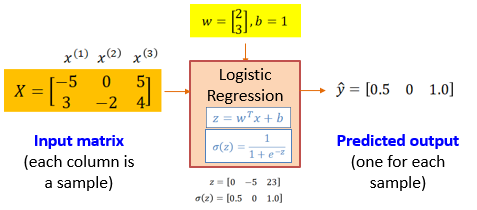

Expected output:
```
Yhat = [[0.5        0.00669285 1.        ]]
predicted = [[1 0 1]]
```

Implement forward propagation

In [ ]:
def forward(X, w, b):
    ### START CODE HERE ### (≈ 2 line of code)    
    # ...
    ### END CODE HERE 
    
    return A

Verify your code

In [ ]:
X = np.array(((-5,0,5),(3,-2,4)))
w = np.array(((2,),(3,)))
b = 1.

Yhat = forward(X, w, b)
print('Yhat =', Yhat)

Implement the predict function (call the `forward` function)

In [ ]:
def predict(X, w, b):
    ### START CODE HERE ### (≈ 2-3 line of code)    
    # ...
    ### END CODE HERE 
    return predicted

Verify your code

In [ ]:
predicted = predict(X, w, b)
print('predicted =', predicted)

### 2.2 Cost function

Now implement the cost function:

$$J(w,b)=\frac{1}{m}\sum_{i=1}^{m}(-y^{(i)}\log(\hat{y}^{(i)}) - (1 - y^{(i)})\log(1-\hat{y}^{(i)}))$$

<font color="blue">
    
#### Exercise 7: 

1. Implement the cost function
2. Then, verify your code using the example here:
    
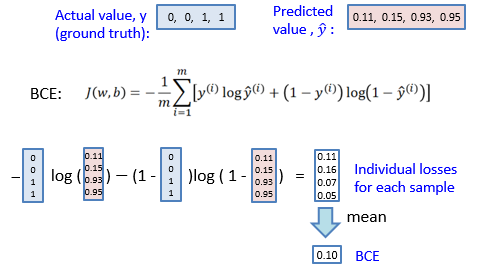
</font>

In [ ]:
# Implement the binary cross entropy

def bce(Yhat, Y):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    Yhat = np.maximum(Yhat, 1e-5)
    
    ### START CODE HERE ### (≈ 2 line of code)
    # ...
    ### END CODE HERE ###

    return loss

Verify your code

In [ ]:
Y    = np.array(((0,0,1,1),))
Yhat = np.array(((0.11, 0.15, 0.93, 0.95),))
loss = bce(Yhat, Y)
print('loss =', loss)

### 2.3 Backpropagation

Now implement the backpropagation:

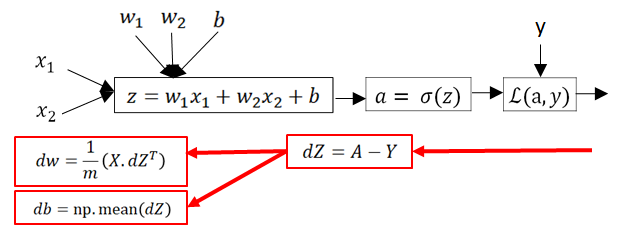

<font color="blue">

#### Exercise 8:

1. Implement the backpropagation function
2. Verify your code using the following test case.

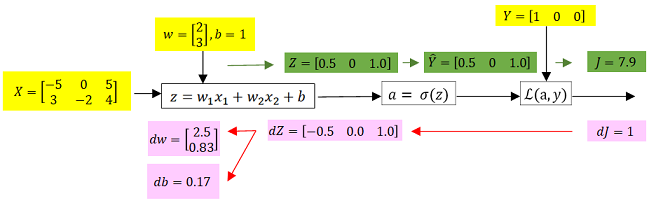
    
Expected output:
```
w:
[[2.5       ]
 [0.82887143]]
db: 0.16889761694055536
```

In [ ]:
def backpropagate(Yhat, Y, X):
    ### START CODE HERE ### (≈ 4 line of code)
    m = X.shape[-1]
    dZ = Yhat - Y
    dw = X.dot(dZ.T)/m
    db = np.mean(dZ)
    ### START CODE HERE ###
    return dw, db

Verify the backpropagate algorithm. Use the test case above to evaluate the correctness of your implementaiton

In [ ]:
X = np.array(((-5, 0, 5),(3, -2, 4)))
Y = np.array(((1, 0, 0)))
w = np.array(((2,),(3,)))
b = 1.

### START CODE HERE ### (≈ 3 line of code)
# perform forward propagation
# ...

# compute the cost
# ...

# perform backpropagation
# ...
### END CODE HERE ###

print('w:')
print(dw)
print('db:', db)

### 2.4 Training with Gradient Descent

Now, its time to train the model. Implement the **gradient descent** algorithm as follows:

1. Initialize w and  b
2. Repeat until convergence
    1. Perform forward propagation to get `Yhat`
    2. Compute the `cost` 
    3. Perform backpropagation to get `dw` and `db`
    4. Update `w = w - lr*dw`
    5. Update `b = b - lr*db`

Expected ans:
```
Cost after iteration 100: 0.900279
Cost after iteration 200: 0.806134
Cost after iteration 300: 0.601848
Cost after iteration 400: 0.441729
Cost after iteration 500: 0.316641
Cost after iteration 600: 0.232562
Cost after iteration 700: 0.204981
Cost after iteration 800: 0.190242
Cost after iteration 900: 0.177568
Cost after iteration 1000: 0.166467
```

In [ ]:
def train(X, Y, num_iter, lr, verbose = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w: weights, a numpy array of size (nx, 1)
    b: bias, a scalar
    X: input matrix. Shape = (nx, m)
    Y: expected output. Shape =  (1, m)
    lr: learning rate 
    
    Returns:
    w, b 
    """
    history =  {}
    
    nx, m = X.shape 
    
    # Initialize w and b with zeros
    ### START CODE HERE (≈ 2 line of code)
    # ...
    ### END CODE HERE ###
    
    for i in range(num_iter):
        
        ### START CODE HERE (≈5 lines of code)
        # forward propagation
        # ...
        
        # compute cost
        # ...
        
        # back propagation
        # ...
        
        # update w and b 
        # ...
        ### END CODE HERE ###

        if (i+1) % 100 == 0 or i == num_iter-1:
            history[i+1] = cost  
            if verbose: print ("Cost after iteration %i: %f" %(i+1, cost))
            
    return w, b, history

In [ ]:
lr = 0.007
num_iter = 1000

w, b, history = train(X_train, Y_train, num_iter, lr, verbose=True)

### 2.5 Evaluating the model

In the following, we shall evaluate the accuracy of the model on both the training and testing set. The accuracy function is given by:

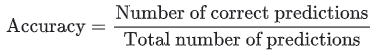

<font color="blue">

#### Exercise 9

Compute the (1) training accuracy and (2) test accuracy to evaluate the performance of your model. Use `sklearn.metrics.accuracy_score(predicted, actual)` to compute the accuracy. 
    
Notes: Since `accuracy_score` only expects vectors as input, you must flatten `predicted`and `actual` prior to calling the function.

Expected answer:
```
Training accuracy = 0.9761
Test accuracy = 0.7200
```

In [ ]:
from sklearn.metrics import accuracy_score

### START CODE HERE (≈4 lines of code)
# compute train_acc
# ...

# compute test_acc
# ...
### END CODE HERE ###

print('Training accuracy = {:.4f}'.format(train_acc))
print('Test accuracy = {:.4f}'.format(test_acc))

Training accuracy is close to 100% but test accuracy is 70%. Your model is working but it is overfitting the training data. This is actually not bad given the small dataset and logistic regression is a linear classifier. 

Now, let's  plot the cost function and the gradients.

In [ ]:
def training_plot(history, label):
    i  = list(history.keys())
    cost_i = list(history.values())
    plt.plot(i, cost_i, label=label)
    plt.legend()
    plt.title ('Cost vs iteration', fontsize=15)
    plt.ylabel('cost')
    plt.xlabel('iterations')
    
training_plot(history, 'lr={}'.format(lr))

You can see that the cost is decreasing over the iterations. This shows that the training is changing the network parameters to fit  the training data. You can continue to train the model even more on the training set. 

<font color="blue">

#### Exercise 10

Try increase the number of iterations to 2000 and retrain the cells. You might see that the training set accuracy goes up, but the test set accuracy goes down. This is because the model has **overfitted** the training set.
    
Expected ans:
```
For 1000 iterations:
    Training accuracy = 0.9761
    Test accuracy = 0.7200

For 2000 iterations:
    Training accuracy = 0.9952
    Test accuracy = 0.6800    
```

---
## Section 3: Test with your own image

Now, the model is ready for deployment.  Use your own image and predict if it contains a cat using the model you have just built.

To do that, you must ensure that you perform the test image have the same dimensionality (resized to the same resolution) and preprocessed (divide by 255) in the same manner as the training set.

<font color="blue">
    
#### Exercise 11
    
Use your image and perform inference to predict if the image contains a cat using the model you have just built. Here are the steps you need.
1. Put your image into the current directory (This lab sheet comes with 'img1.jpg' and 'img2.jpg'
2. Change your image's name in the following code
3. Write the code to do the following:
    1. Resize the image to (64, 64, 3) # remember that we train using images of that size   
    2. Flatten the image to (12288, 1)
    3. Scale the image by 255 
    3. Perform prediction
</font>

In [ ]:
img = Image.open("img1.jpg")
plt.imshow(img)
_ = plt.axis(False)

In [ ]:
# resize image to a resolution of 64x64
# ...
print('shape of img_resized:', img_resized.size)

# convert PIL image to numpy array
# ...
print('shape of X_ori:', X_ori.size)

# flatten the image to (nx, 1). Hint: use X.reshape
# ...
print('shape of X_flatten:', X_flatten.shape, "\n")

# Scale the pixel values by 255
print('Range of X_flatten: ({}, {})'.format(X_flatten.min(), X_flatten.max()))
# ...
print('Range of X: ({:.2f}, {:.2f})'.format(X.min(), X.max()), "\n")

# perform prediction
# ...

print("y = " + str(np.squeeze(predicted)) + ": Your model predicts a \"" + classes[int(np.squeeze(predicted)),].decode("utf-8") +  "\" picture.")